In [75]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [76]:
table=pd.read_html('https://www.basketball-reference.com/leagues/NBA_2020_per_game.html')
df=table[0]
df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
5,6,Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,...,.867,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7
6,7,Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,...,.633,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,11.1
7,8,Kadeem Allen,PG,27,NYK,10,0,11.7,1.9,4.4,...,.636,0.2,0.7,0.9,2.1,0.5,0.2,0.8,0.7,5.0
8,9,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,...,.655,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3
9,10,Justin Anderson,SG,26,BRK,10,1,10.7,1.0,3.8,...,.500,0.1,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8


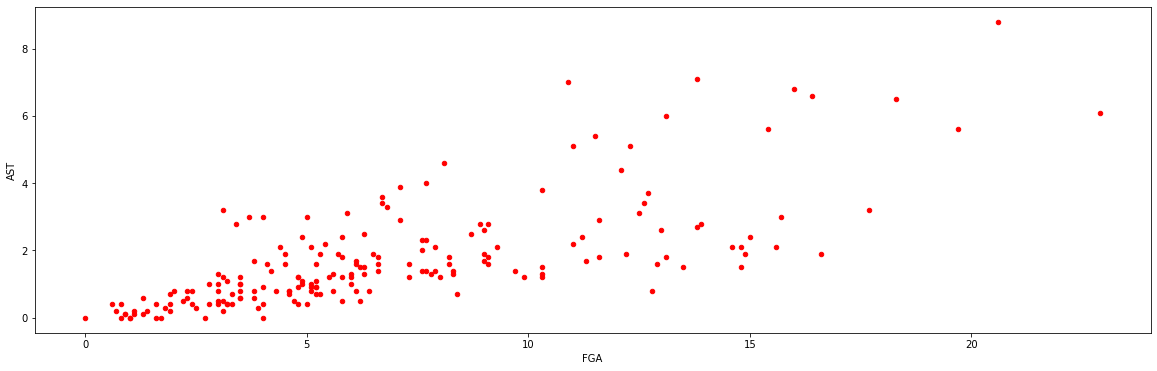

In [77]:
#scatter plot

df=df[df.Age != "Age"]
df=df.loc[0:200,:]
df=df.astype({'AST':'float'})
df=df.astype({'FGA':'float'})
df.plot(kind='scatter', color='red', x='FGA',y='AST')
plt.rcParams["figure.figsize"] = (20,6)
plt.show()

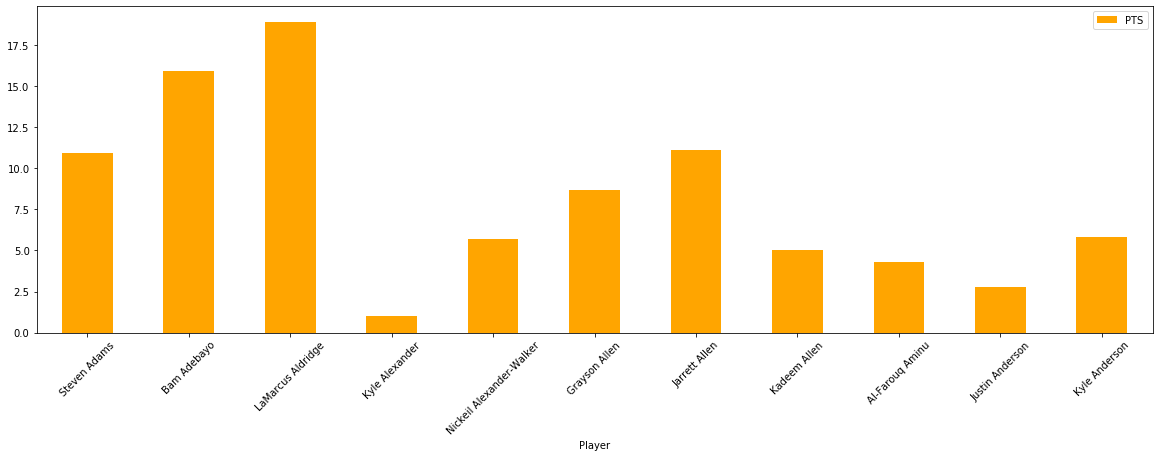

In [78]:
#bar chart 

df=df[df.Age != "Age"]
df_top10=df.loc[0:10,:]
df_top10=df_top10.astype({'PTS':'float'})
df_top10=df_top10.astype({'FGA':'string'})
df_top10.plot(kind='bar',color='orange', x='Player',y='PTS')
plt.rcParams["figure.figsize"] = (20,6)
plt.xticks(rotation = 45)
plt.show()

In [79]:
#create a scaled dataframe

#establish your descriptive columns and your numeric columns
des_cols = ['Player','Pos','Tm','Rk','Age']

num_cols = df.columns.tolist()
for col in des_cols:
    num_cols.remove(col)

#create dataset version with only numeric columns
num_data = df.drop(des_cols,axis=1)

#scale the numeric data
scaler = MinMaxScaler()
num_df_scaled = scaler.fit_transform(num_data.to_numpy())
num_df_scaled = pd.DataFrame(num_df_scaled, columns=num_cols)

#add the descriptive columns to the scaled tata set using merge
df_scaled = pd.merge(df[des_cols], num_df_scaled, left_index=True, right_index=True)

print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()


Scaled Dataset Using MinMaxScaler


,Player,Pos,Tm,Rk,Age,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,OKC,1,26,0.861111,0.863014,0.718182,0.412844,0.331878,...,0.582,0.717391,0.526316,0.588608,0.261364,0.40,0.478261,0.348837,0.475,0.357377
1,Bam Adebayo,PF,MIA,2,22,0.986111,0.986301,0.927273,0.559633,0.480349,...,0.691,0.521739,0.684211,0.645570,0.579545,0.55,0.565217,0.651163,0.625,0.521311
2,LaMarcus Aldridge,C,SAS,3,34,0.722222,0.726027,0.912121,0.678899,0.655022,...,0.827,0.413043,0.482456,0.468354,0.272727,0.35,0.695652,0.325581,0.600,0.619672
3,Kyle Alexander,C,MIA,4,23,0.013889,0.000000,0.106061,0.045872,0.043668,...,NaN,0.217391,0.043860,0.094937,0.000000,0.00,0.000000,0.116279,0.125,0.032787
4,Nickeil Alexander-Walker,SG,NOP,5,21,0.638889,0.013699,0.290909,0.192661,0.248908,...,0.676,0.043478,0.140351,0.113924,0.215909,0.20,0.086957,0.255814,0.300,0.186885


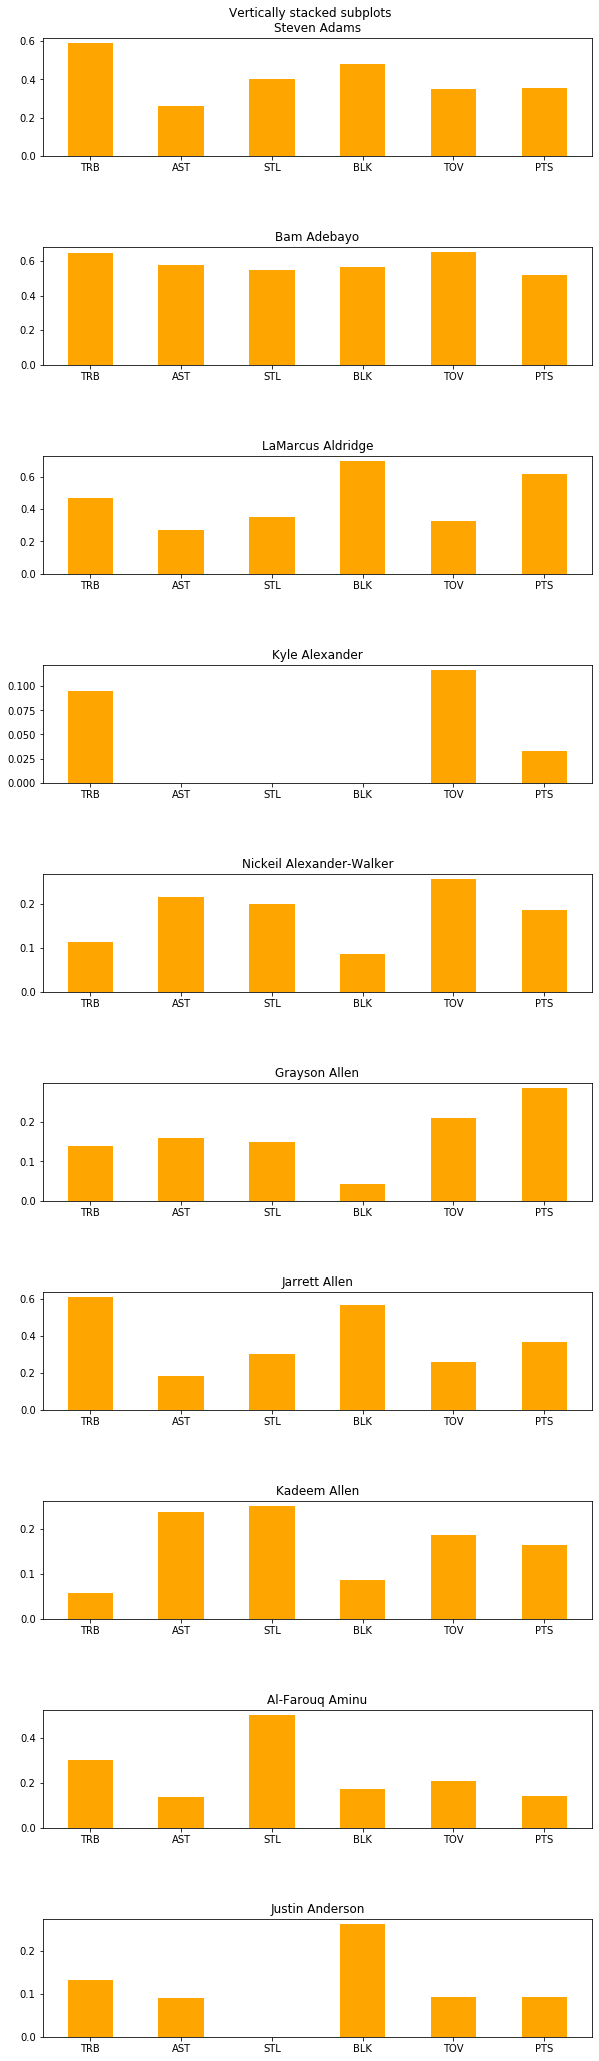

In [81]:
#sub plots using bar charts

mainstats = ['TRB','AST','STL','BLK','TOV','PTS']
top_players = df_scaled['Player'][0:10]

fig, axs = plt.subplots(len(top_players),figsize=(10,30))
fig.suptitle('Vertically stacked subplots')
fig.tight_layout(pad=7)

i=0
for player in top_players:  
    x = mainstats
    y = df_scaled.loc[df_scaled['Player']==player,mainstats].to_numpy()[0]
    axs[i].bar(x, y, width=0.5, color='orange')
    axs[i].set_title(player)
    i=i+1